http://lib.stat.cmu.edu/datasets/boston

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

  Number of Instances: 506 

  Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    Attribute Information (in order):
    
         CRIM     per capita crime rate by town
         ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
         INDUS    proportion of non-retail business acres per town
         CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
         NOX      nitric oxides concentration (parts per 10 million)
         RM       average number of rooms per dwelling
         AGE      proportion of owner-occupied units built prior to 1940
         DIS      weighted distances to five Boston employment centres
         RAD      index of accessibility to radial highways
         TAX      full-value property-tax rate per $10,000
     PTRATIO  pupil-teacher ratio by town
     B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
     LSTAT    % lower status of the population
     MEDV     Median value of owner-occupied homes in $1000's


### 1.IMPORTING NECESSARY LIBRARIES

In [1]:
#import the libraries for additional data exploration purposes

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
#import the sklearn for data set, linear regression model and also to split the train and test data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 2. LOADING DATASET

In [3]:
#calling the function to load the boston dataset present in the sklearn package

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
#Since boston_dataset is a dictionary look at the keys

boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
#since we need features to do the prediction  

boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
#Observe and understand each feature

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 3. DATA PREPARATION

In [7]:
#Now load the data and the features to a data_frame

dataset = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [8]:
#Look at the dataframe

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#clearly the target value column is missing lets add that column

dataset['MEDV'] = boston_dataset.target
print(dataset.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [10]:
#preparing the data - preprocessing 

#look for any null values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
# compute the pair wise correlation for all columns for feature extraction

correlation_matrix = dataset.corr().round(2)
print(correlation_matrix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

Text(0, 0.5, 'MEDV')

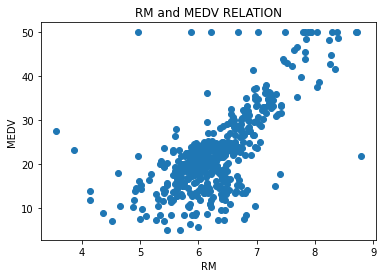

In [12]:
#since the correlation of our target variable MEDV is maximum with the RM let us take a look at that feature for consideration

feature = dataset['RM']
target = dataset['MEDV']
plt.scatter(feature,target, marker='o')
plt.title('RM and MEDV RELATION')
plt.xlabel('RM')
plt.ylabel('MEDV')

### 4. MODEL BUILDING

In [13]:
#data for preparation
#we are taking only RM for demonstrating simple linear regression for more accurate results,
#multiple linear regression can also be considered

x=dataset[['RM']]
y=dataset['MEDV']

In [14]:
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [15]:
#creating the linear regression model

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

### 5. PREDICTION

Text(0, 0.5, 'Dependent variable')

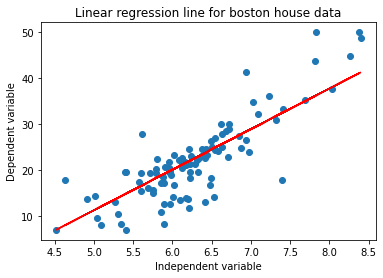

In [17]:
#get the predicted variables and plot the regression line

Y_pred = linear_model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color ='r')
plt.title("Linear regression line for boston house data")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")

### 6. EVALUATING PERFORMANCE

In [ ]:
#performance of the linear model. Gives R2 score

print(linear_model.score(X_test, Y_test))

In [ ]:
print(mean_squared_error(Y_test,Y_pred))